In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

#from tensorflow.keras.models import sequential, load_model 
#from tensorflow.keras.layers import LSTM, Dense, Dropout

import os
import keras
import tensorflow as tf
tf.version



import datetime as dt


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_version2/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.853355,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.758538,460734400


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5531,2021-12-27,177.089996,180.419998,177.070007,180.330002,179.586868,74919600
5532,2021-12-28,180.160004,181.330002,178.529999,179.289993,178.551132,79144300
5533,2021-12-29,179.330002,180.630005,178.139999,179.380005,178.640778,62348900
5534,2021-12-30,179.470001,180.570007,178.089996,178.199997,177.465637,59773000
5535,2021-12-31,178.089996,179.229996,177.259995,177.570007,176.838242,64062300


In [8]:
df1=df.reset_index()['Close']
df1

0         0.999442
1         0.915179
2         0.928571
3         0.848214
4         0.888393
           ...    
5531    180.330002
5532    179.289993
5533    179.380005
5534    178.199997
5535    177.570007
Name: Close, Length: 5536, dtype: float64

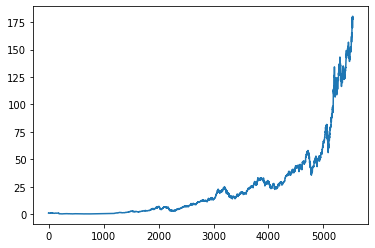

In [9]:
plt.plot(df1)


**Scaling the dataset**

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1

array([[0.00424861],
       [0.00378073],
       [0.00385509],
       ...,
       [0.99472504],
       [0.98817293],
       [0.98467484]])

Splitting dataset into train and test split

In [12]:
training_size=int(len(df1)*0.8)
test_size=len(df1)-training_size


In [13]:
training_size, test_size


(4428, 1108)

In [14]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]


In [15]:
train_data
len(train_data)

4428

In [16]:
test_data
len(test_data)


1108

In [17]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)


(4327, 100)
(4327,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)


(1007, 100)
(1007,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] 
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)   #shape[0]=4327, shape[1]=100 
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

**Create LSTM model**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))  # input_shape= (x_train.shape[1], 1)
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Train the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
model.save('stock_prediction.h5')

Epoch 1/100
68/68 [==============================] - 11s 32ms/step - loss: 4.8777e-04 - val_loss: 0.0018
Epoch 2/100
68/68 [==============================] - 1s 15ms/step - loss: 1.5036e-05 - val_loss: 0.0021
Epoch 3/100
68/68 [==============================] - 1s 20ms/step - loss: 1.5218e-05 - val_loss: 0.0023
Epoch 4/100
68/68 [==============================] - 2s 22ms/step - loss: 1.4370e-05 - val_loss: 0.0035
Epoch 5/100
68/68 [==============================] - 1s 18ms/step - loss: 1.4452e-05 - val_loss: 0.0029
Epoch 6/100
68/68 [==============================] - 2s 23ms/step - loss: 1.4196e-05 - val_loss: 0.0034
Epoch 7/100
68/68 [==============================] - 1s 18ms/step - loss: 1.3145e-05 - val_loss: 0.0027
Epoch 8/100
68/68 [==============================] - 1s 15ms/step - loss: 1.3524e-05 - val_loss: 0.0021
Epoch 9/100
68/68 [==============================] - 1s 15ms/step - loss: 1.3397e-05 - val_loss: 0.0021
Epoch 10/100
68/68 [==============================] - 1s 15ms/s

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


14.951331604183652

In [29]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

91.22814317009325

In [30]:
### Plotting 
import numpy as np
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


In [31]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

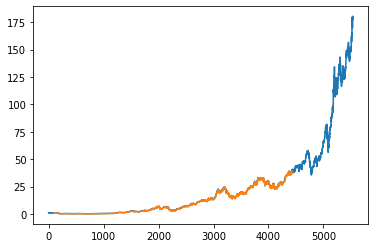

In [32]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)

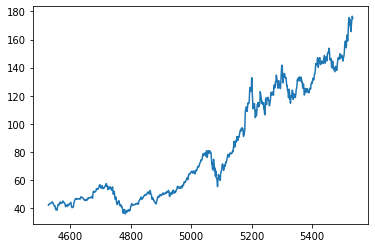

In [33]:
plt.plot(testPredictPlot)
plt.show()

In [34]:
# ### Plotting 
# look_back=100    #timestamps dieako
# trainPredictPlot = np.empty_like(df1)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict



In [35]:
# # shift test predictions for plotting
# testPredictPlot = np.empty_like(df1)
# testPredictPlot[:, :] = np.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

In [36]:
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(df1)
# plt.plot(trainPredictPlot)
# plt.show()

In [39]:
len(test_data)


1108

In [44]:
x_input=test_data[1008:].reshape(1,-1)    #taking previous 100 day data 
x_input.shape

(1, 100)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input


[0.8086017715157645,
 0.8254261472827038,
 0.8265922327658255,
 0.8378084296019568,
 0.8326445477470436,
 0.8113780729798149,
 0.8132659357649573,
 0.8215393418908421,
 0.8299793261045698,
 0.8294795252098056,
 0.8224832788360164,
 0.8179301000141503,
 0.8238159313017752,
 0.8489136354581582,
 0.8417508165491289,
 0.8455265476720168,
 0.8518565094574487,
 0.8554657513341406,
 0.8687364667796984,
 0.8599633486006963,
 0.8541886748710892,
 0.8258703666221577,
 0.8290908874256621,
 0.8211506208176544,
 0.826203511692638,
 0.8248708536742763,
 0.8097122754435758,
 0.7923881765183132,
 0.7951089019796562,
 0.8085462732494981,
 0.8139878019086252,
 0.8144875139617425,
 0.8058809627653775,
 0.7866690066075752,
 0.7917773901962222,
 0.7843924171966423,
 0.7907778772483405,
 0.7712882687337216,
 0.782226907607286,
 0.7871687186606926,
 0.7943315375697222,
 0.7921660279803657,
 0.7916663159272485,
 0.7844479154629087,
 0.7811164036794744,
 0.7969412720511353,
 0.8029380887660871,
 0.812433078641

In [47]:
# demonstrate prediction for next 30 days

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)

        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9584253]
101
1 day input [0.82542615 0.82659223 0.83780843 0.83264455 0.81137807 0.81326594
 0.82153934 0.82997933 0.82947953 0.82248328 0.8179301  0.82381593
 0.84891364 0.84175082 0.84552655 0.85185651 0.85546575 0.86873647
 0.85996335 0.85418867 0.82587037 0.82909089 0.82115062 0.82620351
 0.82487085 0.80971228 0.79238818 0.7951089  0.80854627 0.8139878
 0.81448751 0.80588096 0.78666901 0.79177739 0.78439242 0.79077788
 0.77128827 0.78222691 0.78716872 0.79433154 0.79216603 0.79166632
 0.78444792 0.7811164  0.79694127 0.80293809 0.81243308 0.82470429
 0.82748059 0.82870217 0.82431564 0.824038   0.82781381 0.82520408
 0.84585977 0.83047904 0.82581487 0.83170062 0.83986295 0.83692008
 0.83869687 0.8340327  0.83608714 0.82004012 0.81976247 0.83153404
 0.83158954 0.83714215 0.85096815 0.8752885  0.89016952 0.89277925
 0.89494476 0.89788763 0.86940276 0.88844822 0.91654438 0.91360151
 0.90799333 0.89733234 0.91665546 0.94919363 0.97084883 0.96796146
 0.99511368 0.97451357 0.96668438 0

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:
len(df1)


5536

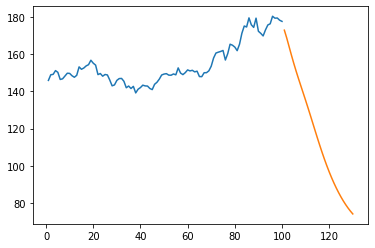

In [50]:
plt.plot(day_new,scaler.inverse_transform(df1[5436:]))   # last 100 day 
plt.plot(day_pred,scaler.inverse_transform(lst_output))

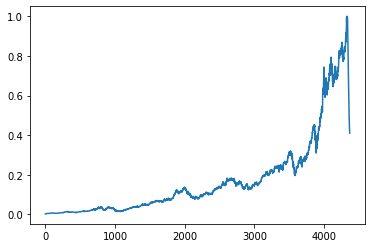

In [51]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [52]:
df3=scaler.inverse_transform(df3).tolist()


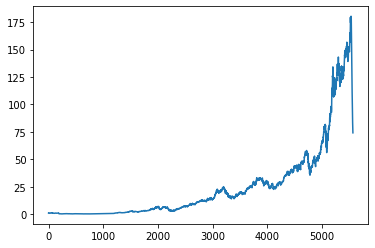

In [53]:
plt.plot(df3)
